In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/voicegender/voice.csv


In [2]:
df=pd.read_csv(os.path.join(dirname, filename))

In [3]:
print("Head of dataset:",df.head())
print('\n')
print("Tail of dataset:",df.tail())

Head of dataset:    meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.0

In [4]:
#------------Null_value_analysis-----------------------
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

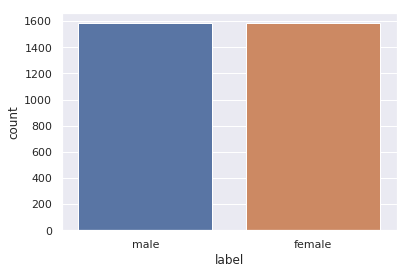

In [5]:
#----------Count_plot_to_check_classes_are_imbalance_or_not-------------
sns.countplot(df['label'])

**Male and Female data distribution is exact same. Which confirms that there is no such case of class imbalance.
Class imbalance can create serious troubles for machine learning model as it treats minority class labels as noise and causes overfitting.**

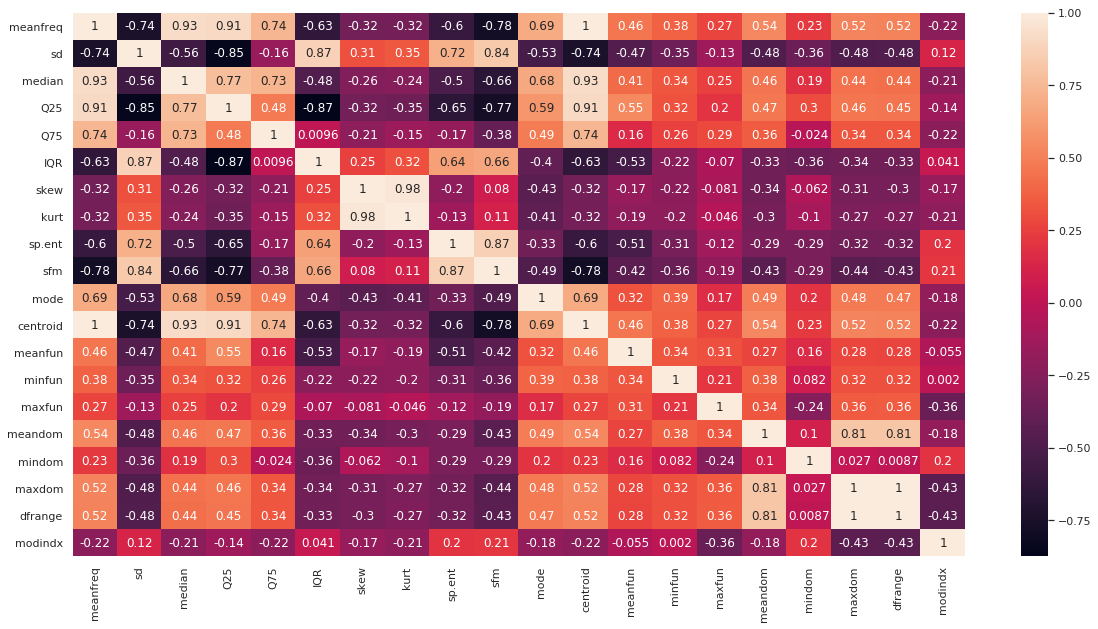

In [6]:
#-------------------Correlation_between_independent_variables--------------------
plt.figure(figsize=(20,10))
corr_df=df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()


In [7]:
target=df['label']
encoder.fit(target)
target=encoder.transform(target)
df=df.drop('label',axis=1)

In [8]:
#------------Split_dataset_into_train_and_test_set----------------
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,target,test_size=0.20,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2534, 20) (634, 20) (2534,) (634,)


In [9]:
#----------Build_naive_model_with-all_featutres-------------------
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(oob_score=True,random_state=41)
print("These are default model parameters:\n",model)
model.fit(X_train,y_train)

These are default model parameters:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=41, verbose=0,
                       warm_start=False)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=41, verbose=0,
                       warm_start=False)

In [10]:
#------------Check_model_performance------------
pred=model.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
print("The accuracy_score is:",accuracy_score(y_test,pred))


The accuracy_score is: 0.9810725552050473


In [11]:
#-----------Calculate_classification_report----------------
print("The classification report is:\n")
print(classification_report(y_test,pred))

The classification report is:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**Classification report show the model performance is very acceptable.
The precision,recall and f1_score is above 90%**

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

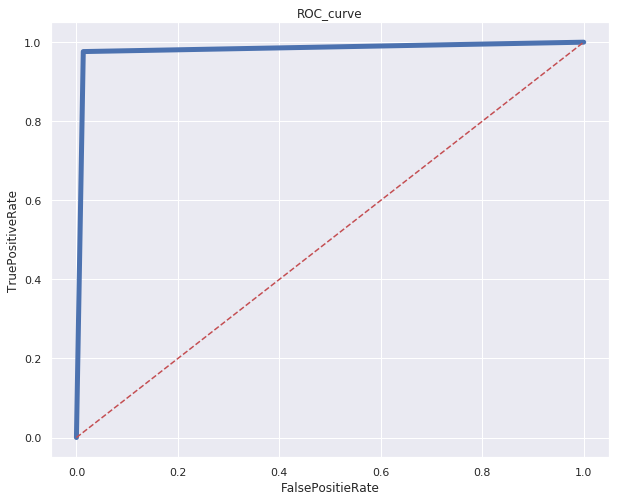

In [12]:
#--------------Calculate_ROC_curve-----------
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,linewidth=5)
plt.plot([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0],'--',color='r')
plt.title('ROC_curve')
plt.xlabel('FalsePositieRate')
plt.ylabel('TruePositiveRate')
plt.xticks

* The above ROC curve of model shows that model is accurate on test set. As larger area is under curve.
* The curve is very far from digonal line.

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix_val=confusion_matrix(y_test,pred)
print(pd.DataFrame(confusion_matrix_val,columns=['Female','Male']))

# 0 - Female, 1 - Male

   Female  Male
0     293     4
1       8   329


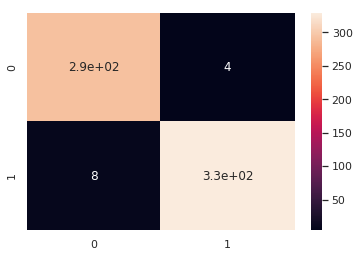

In [14]:
sns.heatmap(pd.DataFrame(confusion_matrix_val),annot=True)

* Looking at confusion matrix we can say that it is better at predicting female category from voice as compare to male category.
* The number of mistakes made in prediction of female category is 4.
* The number of mitakes made in prediction of male category is 15.

In [15]:
#----------------Calculate_feature_importance----------------
feature_imp_df=pd.DataFrame(model.feature_importances_,columns=['Feature_importance'],index=X_train.columns)
feature_imp_df=feature_imp_df.reset_index()
feature_imp_df=feature_imp_df.rename(columns={'index':'Feature_names'})

<BarContainer object of 20 artists>

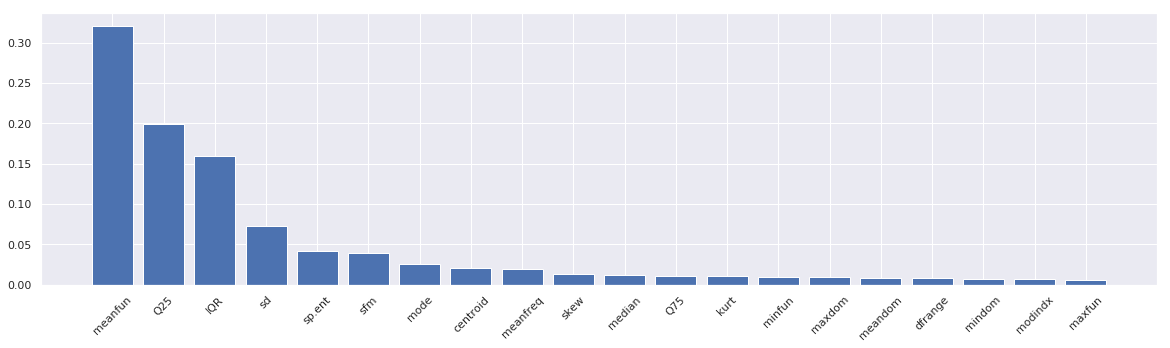

In [16]:
#-------------Arrange_all_feature_according_to_decreasing_order_of_feature_importance----------------
feature_imp_dec_sort=feature_imp_df.sort_values(by='Feature_importance',ascending=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.bar('Feature_names','Feature_importance',data=feature_imp_dec_sort)

In [17]:
#--------------Calculate_cumulative_sum_of_all_features---------------------------
cum_sum_df=pd.DataFrame([])
cumsum_imp_features=list(np.cumsum(feature_imp_dec_sort['Feature_importance']))

cum_sum_df['Feature_names'] = list(feature_imp_dec_sort['Feature_names'])
cum_sum_df['Cum_feature_importance'] = cumsum_imp_features

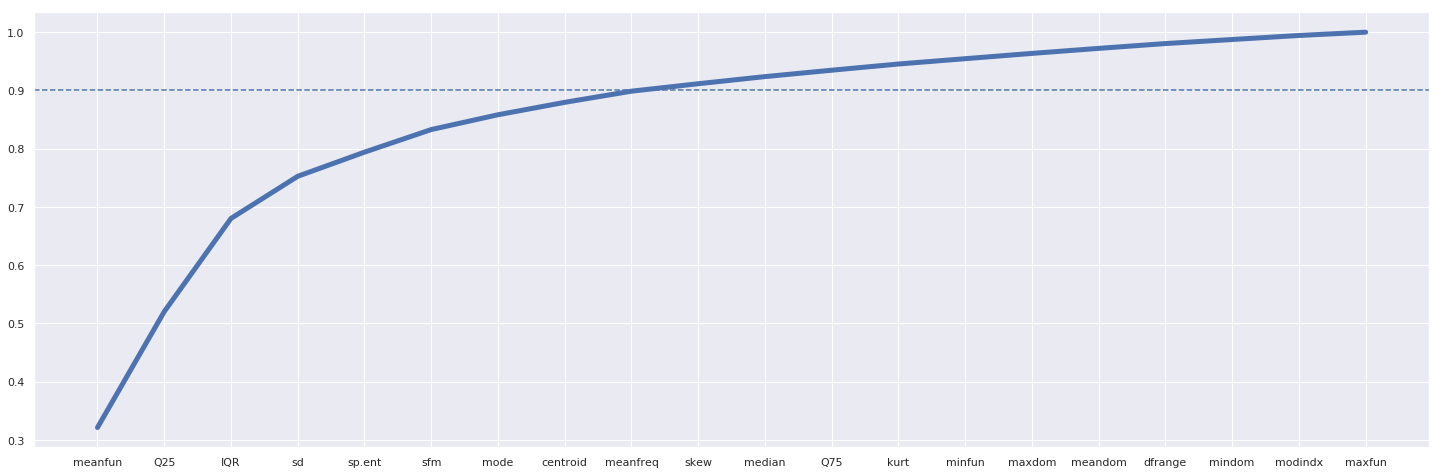

In [18]:
plt.figure(figsize=(25,8))
plt.plot('Feature_names','Cum_feature_importance',data=cum_sum_df,linewidth=5)
plt.axhline(y=0.9,linestyle='--')

** Looking at the feature importance we can infer that 11 feature out of total 21 features are having considarable importance.
Cummulative feature importance shows that 9 out of total 21 features covers 90% of feature importance.**

In [19]:
#----------Select_features_which_contribute_90%_of_feature_importance--------------
selected_features=list(cum_sum_df[cum_sum_df['Cum_feature_importance']<=0.90]['Feature_names'])

In [20]:
#----------Extract_selected_feature_data------------------
X_train_updated=X_train[selected_features]
X_test_updated=X_test[selected_features]

In [21]:
#----------Build_model_on_selected_features-----------------
updated_model=RandomForestClassifier(oob_score=True,random_state=41)
#----------Train_model_on_selected_features-----------------
updated_model.fit(X_train_updated,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=41, verbose=0,
                       warm_start=False)

In [22]:
#-------------Implement_updated_model-------------
updated_pred=updated_model.predict(X_test_updated)

In [23]:
#------------Check_model_performance_of_updated_model--------------
from sklearn.metrics import classification_report,accuracy_score
print("The accuracy_score is:",accuracy_score(y_test,updated_pred))

The accuracy_score is: 0.9763406940063092


In [24]:
#-----------Calculate_classification_report----------------
print("The classification report is:\n")
print(classification_report(y_test,updated_pred))

The classification report is:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.96      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

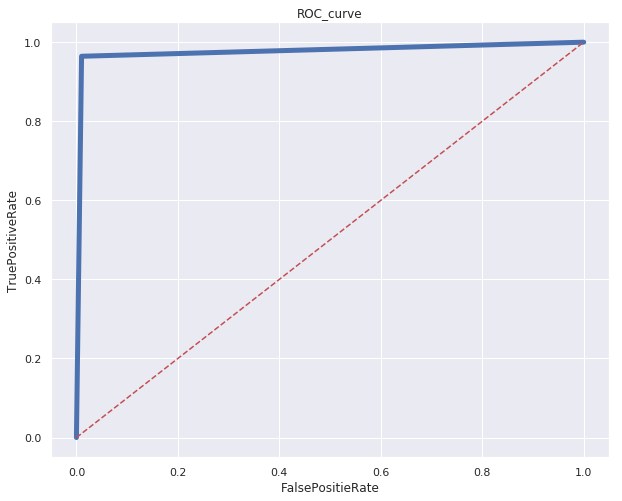

In [25]:
#--------------Calculate_ROC_curve-----------
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, updated_pred)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,linewidth=5)
plt.plot([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0],'--',color='r')
plt.title('ROC_curve')
plt.xlabel('FalsePositieRate')
plt.ylabel('TruePositiveRate')
plt.xticks

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix_val=confusion_matrix(y_test,updated_pred)
print(pd.DataFrame(confusion_matrix_val,columns=['Female','Male']))

# 0 - Female, 1 - Male

   Female  Male
0     294     3
1      12   325


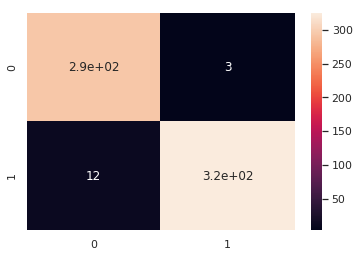

In [27]:
sns.heatmap(pd.DataFrame(confusion_matrix_val),annot=True)

** After selecting feature which contributes 90% of feature importance, we can see that the corresponding accuracy is droped just 1%.
This is not very significant drop if we look at the number of features we reduced.
Current models accuracy is just short compared to all feature model.
The complexity the current model is very less compared to all feature model.**